In [1]:
from utils import *

In [2]:
respondents, results, cardsE, cardsB = loadData()

# Interactions

In [3]:
interactions = pd.read_csv('../data/raw/raw_interactions.csv', index_col=0)
pairs = respondents[['respondent', 'variant']].drop_duplicates().reset_index()
pairs.rename(columns={'index': 'respondentID'}, inplace=True)
results = results.merge(pairs, on=['respondent', 'variant'])
respondents = respondents.merge(pairs, on=['respondent', 'variant'])

In [4]:
interactions.groupby(['variant', 'respondent']).size().reset_index().groupby('variant').mean()[[0]]

,0
variant,
B30,46.000
B50,69.450
E30,44.100
E50,66.675


In [5]:
# move -> card to some category
# rename -> rename category
# remove -> remove category
# sort -> change card order

## Caluculate interactions

In [6]:
toMerge = [
    respondents[['respondentID', 'categories', 'variant']],
    interactions[interactions.type=='rename'].groupby('respondentID').size().reset_index().rename(columns={0:'rename'}),
    (interactions[interactions.type=='rename'].groupby('respondentID').size() - respondents.categories).reset_index().rename(columns={0:'fix'}),
    interactions[interactions.type=='move'].groupby('respondentID').size().reset_index().rename(columns={0:'move'}),
    interactions[interactions.type=='sort'].groupby('respondentID').size().reset_index().rename(columns={0:'sort'}),
    interactions[interactions.type=='remove'].groupby('respondentID').size().reset_index().rename(columns={0:'delete'}),
    (interactions[interactions.type=='move'].groupby('respondentID').size() - respondents.variant.apply(lambda x: 30 if x.endswith('30') else 50)).reset_index().rename(columns={0:'overMove'})
]
res = reduce(lambda left, right: pd.merge(left, right, on='respondentID', how='left'), toMerge).fillna(0)
res.groupby('variant').agg(['mean', 'std'])

respondentID            categories           rename              fix  \
                mean        std       mean       std   mean       std   mean   
variant                                                                        
B30            139.5  11.690452      6.000  2.375084  6.300  2.441101  0.300   
B50             99.5  11.690452      7.600  2.415760  8.475  2.764125  0.875   
E30             59.5  11.690452      5.825  2.510363  6.475  3.063327  0.650   
E50             19.5  11.690452      5.975  2.292546  7.400  2.985435  1.425   

                     move             sort           delete            \
              std    mean       std   mean       std   mean       std   
variant                                                                 
B30      0.607644  35.575  6.287503  0.975  1.656185  3.150  5.544921   
B50      1.090460  56.725  9.347940  1.725  3.775681  2.525  5.995672   
E30      1.051251  35.025  6.322477  0.700  1.114013  1.900  3.372589   
E50      1.337573  56.350  6.791964  1.100  2.394438  1.825  2.427276   

        overMove            
            mean       std  
variant                     
B30        5.575  6.287503  
B50        6.725  9.347940  
E30        5.025  6.322477  
E50        6.350  6.791964

## Explorative analysis, testing

<Axes: title={'center': 'fix'}, xlabel='variant'>

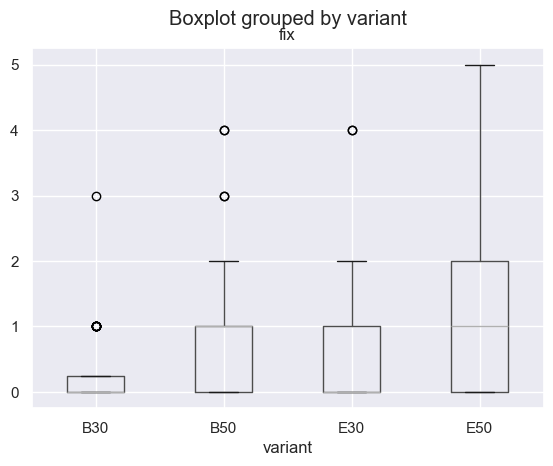

In [7]:
res.boxplot(column='fix', by='variant')

<Axes: title={'center': 'overMove'}, xlabel='variant'>

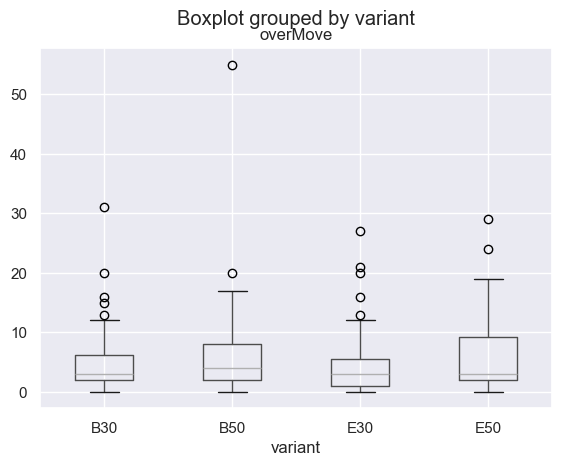

In [8]:
res.boxplot(column='overMove', by='variant')

In [9]:
res['fixRelative'] = res['fix'] / res['rename'] * 100

In [10]:
my_mann(['rename', 'fix', 'move', 'sort', 'delete', 'overMove', 'fixRelative'], res[res.variant=='E50'], res[res.variant=='E30'])

,feature,stat,p,p<.001,n1,n2,z,effsize,m1,m2,s1,s2,med1,med2,q125,q225,q175,q275
0,rename,949.0,1.498052e-01,,40,40,1.433753,0.160298,7.400000,6.475000,2.985435,3.063327,7.0,6.5,5.75,4.0,9.250000,8.25000
1,fix,1086.5,3.285420e-03,yes,40,40,2.756848,0.308225,1.425000,0.650000,1.337573,1.051251,1.0,0.0,0.00,0.0,2.000000,1.00000
2,move,1566.5,1.526979e-13,yes,40,40,7.375650,0.824623,56.350000,35.025000,6.791964,6.322477,53.0,33.0,52.00,31.0,59.250000,35.50000
3,sort,909.0,2.510452e-01,,40,40,1.048853,0.117265,1.100000,0.700000,2.394438,1.114013,1.0,0.0,0.00,0.0,1.000000,1.00000
4,delete,842.5,6.741315e-01,,40,40,0.408956,0.045723,1.825000,1.900000,2.427276,3.372589,1.0,1.0,0.00,0.0,3.000000,2.00000
5,overMove,924.0,2.318872e-01,,40,40,1.193191,0.133403,6.350000,5.025000,6.791964,6.322477,3.0,3.0,2.00,1.0,9.250000,5.50000
6,fixRelative,1128.0,8.479022e-04,yes,40,40,3.156181,0.352872,17.014881,7.196174,14.123635,11.493528,20.0,0.0,0.00,0.0,28.571429,11.27451


In [11]:
my_mann(['rename', 'fix', 'move', 'sort', 'delete', 'overMove', 'fixRelative'], res[res.variant=='B50'], res[res.variant=='B30'])

,feature,stat,p,p<.001,n1,n2,z,effsize,m1,m2,s1,s2,med1,med2,q125,q225,q175,q275
0,rename,1161.0,4.812985e-04,yes,40,40,3.473724,0.388374,8.47500,6.300000,2.764125,2.441101,8.500000,6.0,6.75,4.0,10.00000,7.250000
1,fix,1063.5,3.629520e-03,yes,40,40,2.535530,0.283481,0.87500,0.300000,1.090460,0.607644,1.000000,0.0,0.00,0.0,1.00000,0.250000
2,move,1563.5,1.926664e-13,yes,40,40,7.346782,0.821395,56.72500,35.575000,9.347940,6.287503,54.000000,33.0,52.00,32.0,58.00000,36.250000
3,sort,850.5,5.971020e-01,,40,40,0.485936,0.054329,1.72500,0.975000,3.775681,1.656185,0.500000,0.0,0.00,0.0,1.00000,1.000000
4,delete,790.0,9.249123e-01,,40,40,-0.096225,-0.010758,2.52500,3.150000,5.995672,5.544921,1.000000,1.0,0.00,0.0,2.25000,3.000000
5,overMove,852.5,6.146871e-01,,40,40,0.505181,0.056481,6.72500,5.575000,9.347940,6.287503,4.000000,3.0,2.00,2.0,8.00000,6.250000
6,fixRelative,1044.0,8.118358e-03,yes,40,40,2.347891,0.262502,9.26604,4.234307,10.618181,9.375931,8.391608,0.0,0.00,0.0,14.56044,2.272727


In [12]:
my_mann(['rename', 'fix', 'move', 'sort', 'delete', 'overMove', 'fixRelative'], res[res.variant=='E50'], res[res.variant=='B50'])

,feature,stat,p,p<.001,n1,n2,z,effsize,m1,m2,s1,s2,med1,med2,q125,q225,q175,q275
0,rename,614.0,0.072446,,40,40,-1.789786,-0.200104,7.400000,8.47500,2.985435,2.764125,7.0,8.500000,5.75,6.75,9.250000,10.00000
1,fix,994.5,0.050342,,40,40,1.871577,0.209249,1.425000,0.87500,1.337573,1.090460,1.0,1.000000,0.00,0.00,2.000000,1.00000
2,move,789.0,0.919092,,40,40,-0.105848,-0.011834,56.350000,56.72500,6.791964,9.347940,53.0,54.000000,52.00,52.00,59.250000,58.00000
3,sort,815.5,0.876142,,40,40,0.149149,0.016675,1.100000,1.72500,2.394438,3.775681,1.0,0.500000,0.00,0.00,1.000000,1.00000
4,delete,768.0,0.754111,,40,40,-0.307920,-0.034427,1.825000,2.52500,2.427276,5.995672,1.0,1.000000,0.00,0.00,3.000000,2.25000
5,overMove,789.0,0.919092,,40,40,-0.105848,-0.011834,6.350000,6.72500,6.791964,9.347940,3.0,4.000000,2.00,2.00,9.250000,8.00000
6,fixRelative,1060.0,0.010043,yes,40,40,2.501851,0.279715,17.014881,9.26604,14.123635,10.618181,20.0,8.391608,0.00,0.00,28.571429,14.56044


In [13]:
my_mann(['rename', 'fix', 'move', 'sort', 'delete', 'overMove', 'fixRelative'], res[res.variant=='E30'], res[res.variant=='B30'])

,feature,stat,p,p<.001,n1,n2,z,effsize,m1,m2,s1,s2,med1,med2,q125,q225,q175,q275
0,rename,803.0,0.980619,,40,40,0.028868,0.003227,6.475000,6.300000,3.063327,2.441101,6.5,6.0,4.0,4.0,8.25000,7.250000
1,fix,926.0,0.138725,,40,40,1.212436,0.135554,0.650000,0.300000,1.051251,0.607644,0.0,0.0,0.0,0.0,1.00000,0.250000
2,move,713.0,0.402344,,40,40,-0.837158,-0.093597,35.025000,35.575000,6.322477,6.287503,33.0,33.0,31.0,32.0,35.50000,36.250000
3,sort,758.0,0.652243,,40,40,-0.404145,-0.045185,0.700000,0.975000,1.114013,1.656185,0.0,0.0,0.0,0.0,1.00000,1.000000
4,delete,728.0,0.474461,,40,40,-0.692820,-0.077460,1.900000,3.150000,3.372589,5.544921,1.0,1.0,0.0,0.0,2.00000,3.000000
5,overMove,713.0,0.402344,,40,40,-0.837158,-0.093597,5.025000,5.575000,6.322477,6.287503,3.0,3.0,1.0,2.0,5.50000,6.250000
6,fixRelative,910.0,0.199596,,40,40,1.058475,0.118341,7.196174,4.234307,11.493528,9.375931,0.0,0.0,0.0,0.0,11.27451,2.272727


In [14]:
res.groupby('variant').fixRelative.agg(['mean', 'median', 'std', 'min', 'max'])

,mean,median,std,min,max
variant,,,,,
B30,4.234307,0.000000,9.375931,0.0,50.000000
B50,9.266040,8.391608,10.618181,0.0,40.000000
E30,7.196174,0.000000,11.493528,0.0,44.444444
E50,17.014881,20.000000,14.123635,0.0,50.000000


<Axes: xlabel='fixRelative'>

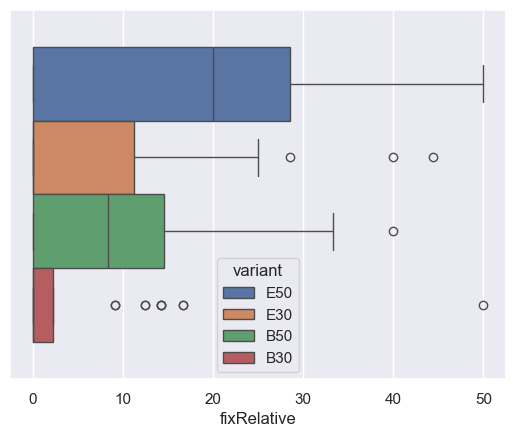

In [15]:
sns.boxplot(data=res, x='fixRelative', hue='variant')

In [16]:
for variant, group in interactions.groupby('variant'):
    print(variant)
    for i in group.respondentID.unique():
        x = respondents.loc[(respondents.respondentID==i), 'categories'].values[0]
        y = interactions.loc[(interactions.respondentID==i) & (interactions.type=='rename')].shape[0]
        if (int(x) < int(y)):
            print(y-x, end='  ')
            names = interactions[(interactions.respondentID==i) & (interactions.type=='rename')]
            duplicates = names[names.duplicated('category', keep=False)]
            for name, groupp in duplicates.groupby('category'):
                print('', '->'.join(groupp.title.values))

B30
1   Banking->Specialist Support
1   Other->Other Useful Services
1   l websites->handy websites
1   planning for later lige->planning for later life
1   Support services->Support services/ Tools
1   Insurane->Insurance
1   insurance->insurance and claim
1   Accounts->Account types
1   Loan->Financial Assistance
3   Debts->Debts and expenditure->Debts and expenditure and recovery
 Analysis->Analysis tools
B50
4   Educational->Support/Educational
 Navigational->Account
 Support->Footer
1   Banking tools->Banking help
1   Security->Security/Safety
1   banks->online banking
2   Stocks, Bonds & ISAs->Investing & Bonds
1   Deposit->Deposit/Withdraw
1   Accounts->FInance
1  1  2   Savings->Savings & investments
1   Account ->Account Services
1   Stocks & Bonds->Investments
1   Insurance covers->Insurance expenses
1   debts->borrowing
3   Pensions->Pensions and Retirement->Pensions
 Tr->Investing
3   Investments->Pension and investments
 Mortgages->Borrowing
 Payments->Payments and transfe

## Rename times

In [17]:
interactions = interactions.sort_values(['respondentID', 'at'])
interactions['normalizedAt'] = (
    interactions.groupby('respondentID')['at']
    .transform(lambda x: (x - x.min()) / (x.max() - x.min()))
)
renames = interactions[interactions['type'] == 'rename']
meanRenames = renames.groupby(['respondentID', 'variant'])['normalizedAt'].mean().reset_index()

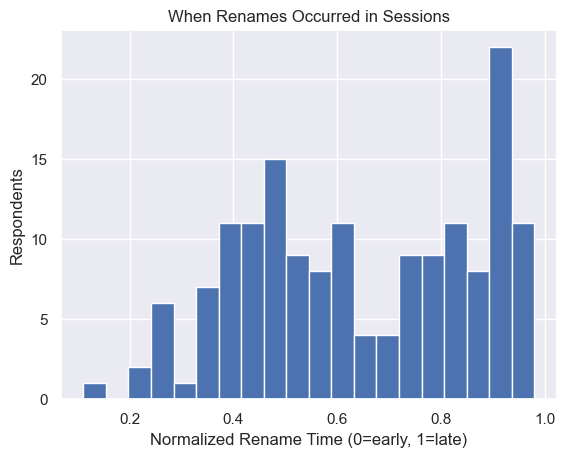

In [18]:
plt.hist(meanRenames['normalizedAt'], bins=20)
plt.xlabel('Normalized Rename Time (0=early, 1=late)')
plt.ylabel('Respondents')
plt.title('When Renames Occurred in Sessions')
plt.show()

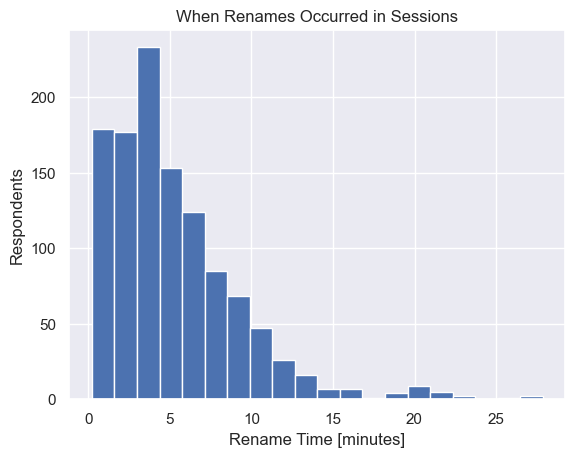

In [19]:
plt.hist(interactions[interactions.type=='rename']['at'] / (1000 * 60), bins=20)
plt.xlabel('Rename Time [minutes]')
plt.ylabel('Respondents')
plt.title('When Renames Occurred in Sessions')
plt.show()

In [20]:
meanRenames

,respondentID,variant,normalizedAt
0,0,E50,0.980148
1,1,E50,0.481845
2,2,E50,0.927747
3,3,E50,0.552487
4,4,E50,0.592879
...,...,...,...
155,155,B30,0.947180
156,156,B30,0.868379
157,157,B30,0.921116
158,158,B30,0.898400


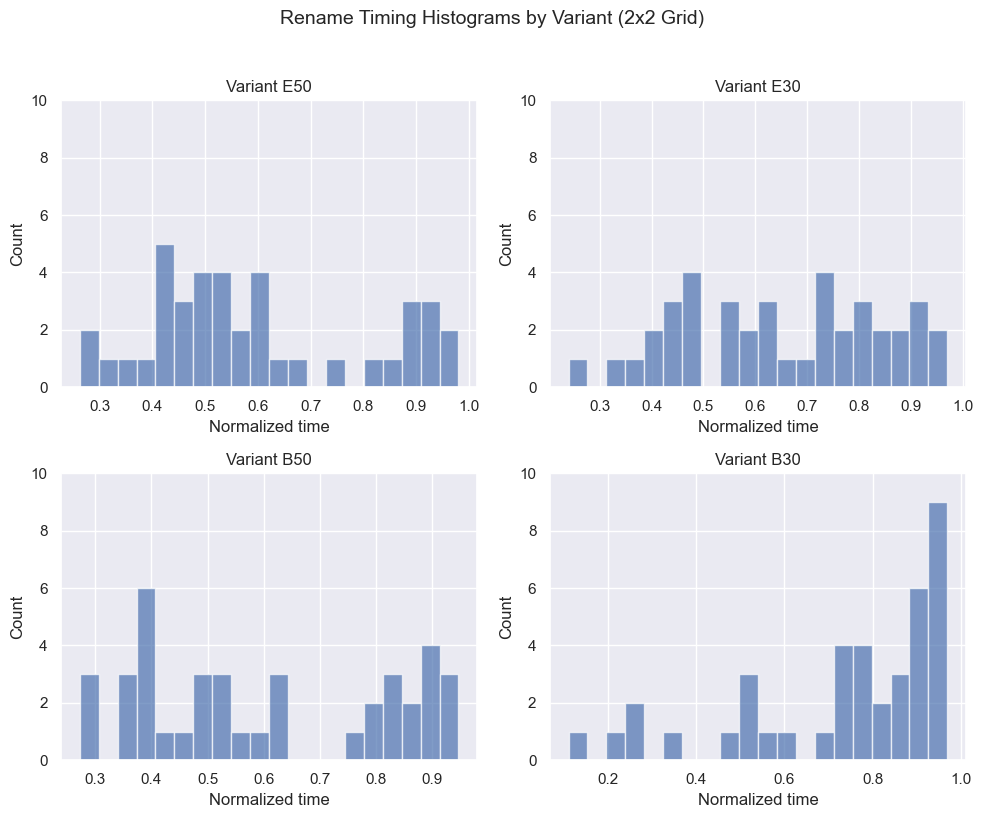

In [21]:
variants = renames['variant'].unique()
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, variant in enumerate(variants):
    subset = meanRenames[meanRenames.variant==variant]
    axes[i].hist(subset['normalizedAt'], bins=20, alpha=0.7)
    axes[i].set_title(f'Variant {variant}')
    axes[i].set_xlabel('Normalized time')
    axes[i].set_ylabel('Count')

for ax in axes:
    ax.set_ylim(0, 10)

fig.suptitle('Rename Timing Histograms by Variant (2x2 Grid)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

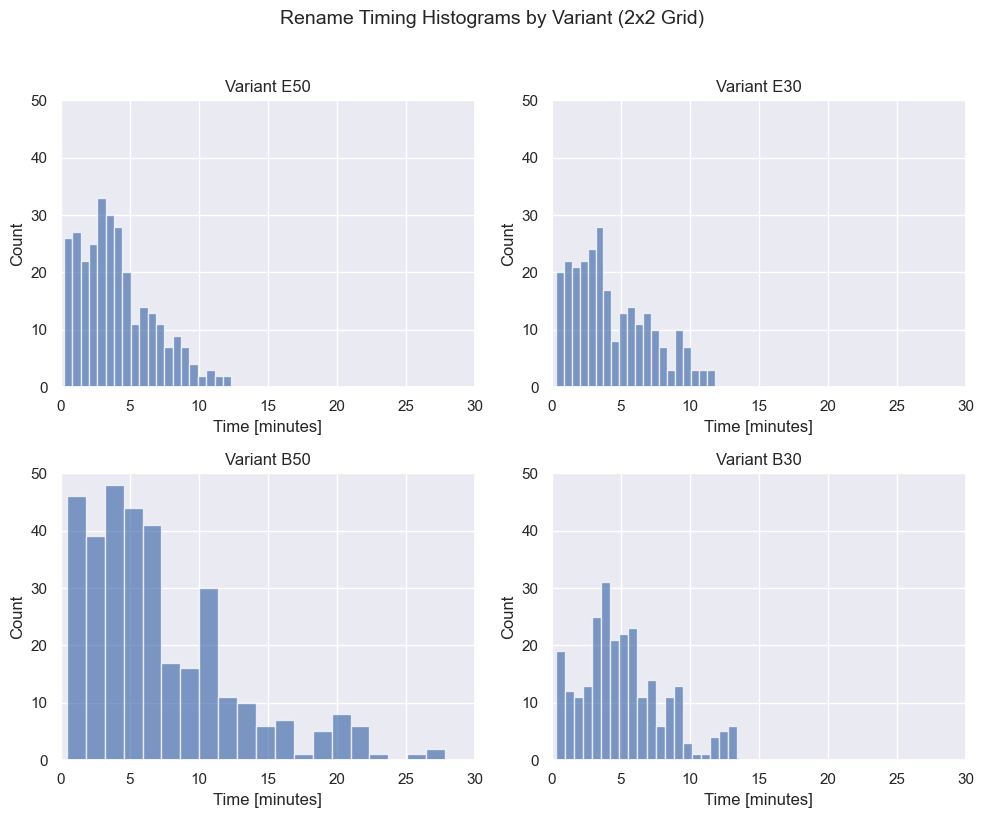

In [22]:
variants = renames['variant'].unique()
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, variant in enumerate(variants):
    subset = interactions[(interactions.type=='rename') & (interactions.variant==variant)]
    axes[i].hist(subset['at'] / (1000 * 60), bins=20, alpha=0.7)
    axes[i].set_title(f'Variant {variant}')
    axes[i].set_xlabel('Time [minutes]')
    axes[i].set_ylabel('Count')

for ax in axes:
    ax.set_xlim(0, 30)
    ax.set_ylim(0, 50)

fig.suptitle('Rename Timing Histograms by Variant (2x2 Grid)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [23]:
print(renames.groupby('variant')['normalizedAt'].mean())

variant
B30    0.760865
B50    0.609602
E30    0.669902
E50    0.584435
Name: normalizedAt, dtype: float64


In [24]:
print(meanRenames.groupby('variant')['normalizedAt'].mean())

variant
B30    0.731365
B50    0.604174
E30    0.650790
E50    0.594704
Name: normalizedAt, dtype: float64


<Figure size 800x500 with 0 Axes>

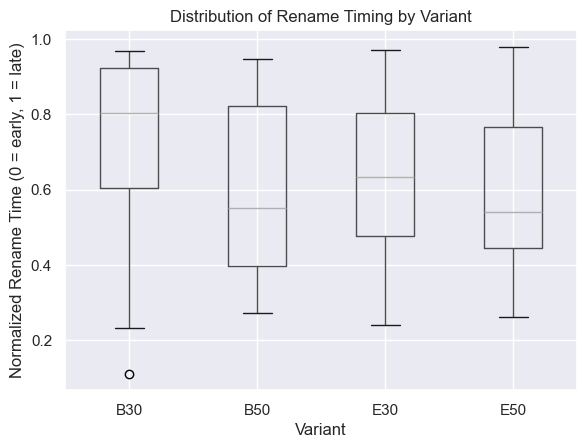

In [25]:
plt.figure(figsize=(8, 5))
meanRenames.boxplot(column='normalizedAt', by='variant')
plt.title('Distribution of Rename Timing by Variant')
plt.suptitle('')
plt.xlabel('Variant')
plt.ylabel('Normalized Rename Time (0 = early, 1 = late)')
plt.show()

In [26]:
interactions['at'] = interactions['at'] / 60000

<Figure size 800x500 with 0 Axes>

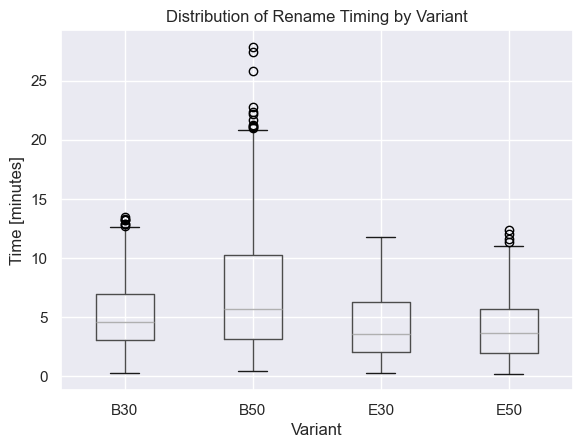

In [27]:
plt.figure(figsize=(8, 5))
interactions[interactions.type=='rename'].boxplot(column='at', by='variant')
plt.title('Distribution of Rename Timing by Variant')
plt.suptitle('')
plt.xlabel('Variant')
plt.ylabel('Time [minutes]')
plt.show()